In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%config InlineBackend.figure_formats = ['pdf']

In [2]:
filename = 'tmp.json'
with open(filename) as json_file:
    data = json.load(json_file)
testRuns = pd.io.json.json_normalize(data)
#testRuns = testRuns.loc[testRuns['tripGenRate'] < 0.06]
#testRuns = testRuns.loc[testRuns['tripGenRate'] > 0.00]
testRuns = testRuns.loc[testRuns['density'] < 128]
testRuns = testRuns.loc[testRuns['density'] > 0]

In [3]:
testRuns.columns

Index(['step', 'timeMins', 'numTravelers', 'averageTrips', 'averageSteps',
       'averageStepsPerTrip', 'averageDist', 'averageDistPerTrip',
       'tripsCompleted', 'passengerSteps', 'stepsMoving', 'stepsWaiting',
       'distanceTraveled', 'reservationsCanceled', 'reservationsCompleted',
       'scheduleInvalid', 'stepsWithPassenger', 'stepsWithoutPassenger',
       'stepsTravelingWithPassenger', 'stepsTravelingWithoutPassenger',
       'distWithPassenger', 'distWithoutPassenger', 'lastTripStep',
       'reservationPriority', 'lanePolicy', 'numVehicles', 'numRoadCells',
       'grids', 'density', 'tripGenRate', 'hovMin', 'seed'],
      dtype='object')

In [4]:
grids = 4
df = testRuns
numRoadCells = (16*grids*2*(grids*2+1)*2 + (16*grids*2*grids*2)) * 2
df['distWithPassenger'] = df['distanceTraveled'].apply(lambda o: sum(o[1:]))
df['stepsWithPassenger'] = df['stepsMoving'].apply(lambda o: sum(o[1:])) + df['stepsWaiting'].apply(lambda o: sum(o[1:]))
df['distWithoutPassenger'] = df['distanceTraveled'].apply(lambda o: o[0])
df['stepsWithoutPassenger'] = df['stepsMoving'].apply(lambda o: o[0]) + df['stepsWaiting'].apply(lambda o: o[0])
df['stepsTravelingWithoutPassenger'] = df['stepsMoving'].apply(lambda o: o[0])

In [5]:
df['averageSpeedWithPassenger'] = df['distWithPassenger'].div(df['stepsWithPassenger']) * 7.5 / 1000 * 60 * 60 
df['averageSpeedWithoutPassenger'] = df['distWithoutPassenger'].div(df['stepsWithoutPassenger'])
df['averageSpeed'] = df['distanceTraveled'].apply(lambda o: sum(o)) / (df['stepsMoving'].apply(lambda o: sum(o)) + df['stepsWaiting'].apply(lambda o: sum(o))) * 7.5 / 1000 * 60 * 60 
df['averageStepsWithoutPassenger'] = df['stepsWithoutPassenger'].div(df['numVehicles'])
df['averageStepsTravelingWithoutPassenger'] = df['stepsTravelingWithoutPassenger'].div(df['numVehicles'])
df['densityCell'] = df['numVehicles'].div(numRoadCells)
df['densityKm'] = df['numVehicles'].div(numRoadCells)/7.5*1000
densityLabelsCell = np.around(np.arange(0.1, 0.575, 0.025), 3)
densityBinsCell = np.arange(0.075, 0.575, 0.025)
densityLabelsKm = np.arange(20, 75, 5)
densityBinsKm = np.arange(15, 75, 5)
df['densityBin'] = pd.cut(df['densityKm'], densityBinsKm, labels = densityLabelsKm)
testRuns = df
#32*grids*grids/numRoadCells/7.5*1000

In [6]:
testRuns['density'].describe()

count    4573.000000
mean       96.069976
std        17.525320
min        64.000000
25%        81.000000
50%        95.000000
75%       109.000000
max       127.000000
Name: density, dtype: float64

In [7]:
df['averageSpeedWithPassenger']

57       28.100476
58       27.987507
59       28.174713
60       28.105366
61       27.721207
           ...    
11611    25.069433
11612    25.251406
11613    25.501838
11614    25.257348
11615    24.369815
Name: averageSpeedWithPassenger, Length: 4573, dtype: float64

In [8]:
testRunsComp = testRuns.loc[testRuns['step'] == 3600].copy()
#testRunsComp = testRunsComp.loc[testRunsComp['lastTripStep'] >= 3599]
row_indexer = testRunsComp['lanePolicy'] == False
testRunsComp.loc[row_indexer, 'hovMin'] = 0
testRunsComp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,averageDist,averageDistPerTrip,tripsCompleted,passengerSteps,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
62,3600,60.0,1024,3343,442709,132.428650,452984,135.50224,23398,3033806,...,3,1324367675,27.730318,1.167932,29.128858,1323.961993,900.543074,0.177885,23.717949,25
68,3600,60.0,953,3357,415442,123.753944,454977,135.53084,23469,2853666,...,0,1324367675,29.706844,1.188832,30.672314,1453.681588,980.803209,0.177885,23.717949,25
74,3600,60.0,1003,3357,436288,129.963650,458350,136.53560,23419,2949575,...,0,1324367675,28.840513,1.247249,30.708315,1391.036318,977.348818,0.177885,23.717949,25
80,3600,60.0,1740,5744,822636,143.216570,776281,135.14641,35582,5232692,...,1,1324367676,25.010517,1.221410,26.305347,585.210156,406.596094,0.192308,25.641026,30
86,3600,60.0,1826,5633,756974,134.382030,768408,136.41187,35496,4799745,...,0,1324367676,27.066309,1.128624,27.761413,734.785156,474.771875,0.192308,25.641026,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,3600,60.0,5872,13324,2327104,174.655060,2139254,160.55644,70769,11786822,...,0,1324368438,24.586108,1.006971,24.675187,123.274089,73.741536,0.230769,30.769231,35
11574,3600,60.0,18210,11051,2989817,270.547180,1997180,180.72392,58431,13347499,...,0,1324368438,19.091010,1.006874,19.301147,93.483073,55.069010,0.230769,30.769231,35
11603,3600,60.0,14862,4657,687022,147.524580,688769,147.89972,66634,10302762,...,3,1324368441,22.757581,0.919578,22.821350,110.878827,63.290816,0.235577,31.410256,35
11609,3600,60.0,5176,13843,2090947,151.047240,2074202,149.83760,76320,11397406,...,0,1324368441,26.713089,1.004818,26.728019,128.924107,77.027423,0.235577,31.410256,35


In [9]:
testRunsComp['density'].describe()

count    730.000000
mean      95.542466
std       17.352205
min       64.000000
25%       81.000000
50%       95.000000
75%      109.000000
max      127.000000
Name: density, dtype: float64

In [10]:
#print(sum(df.distWithPassenger == df.distWithPassengerTMP))
#print(sum(df.stepsWithPassenger == df.stepsWithPassengerTMP))
#print(sum(df.distWithoutPassenger == df.distWithoutPassengerTMP))
#print(sum(df.stepsWithoutPassenger == df.stepsWithoutPassengerTMP))
#print(sum(df.stepsTravelingWithoutPassenger == df.stepsTravelingWithoutPassengerTMP))

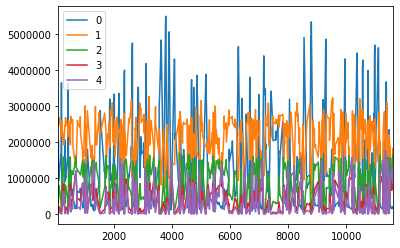

In [11]:
testRunsComp.distanceTraveled.apply(lambda o:o[0]).plot(label='0')
testRunsComp.distanceTraveled.apply(lambda o:o[1]).plot(label='1')
testRunsComp.distanceTraveled.apply(lambda o:o[2]).plot(label='2')
testRunsComp.distanceTraveled.apply(lambda o:o[3]).plot(label='3')
testRunsComp.distanceTraveled.apply(lambda o:o[4]).plot(label='4')
plt.legend()

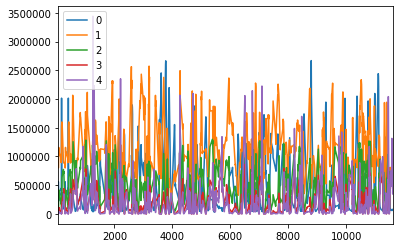

In [12]:
testRunsComp.stepsWaiting.apply(lambda o:o[0]).plot(label='0')
testRunsComp.stepsWaiting.apply(lambda o:o[1]).plot(label='1')
testRunsComp.stepsWaiting.apply(lambda o:o[2]).plot(label='2')
testRunsComp.stepsWaiting.apply(lambda o:o[3]).plot(label='3')
testRunsComp.stepsWaiting.apply(lambda o:o[4]).plot(label='4')
plt.legend()

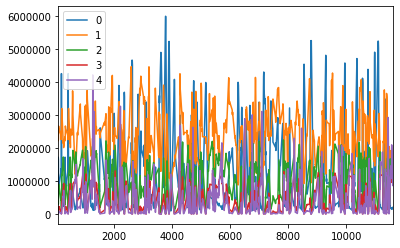

In [13]:
(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])).plot(label='0')
(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])).plot(label='1')
(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])).plot(label='2')
(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])).plot(label='3')
(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])).plot(label='4')
plt.legend()

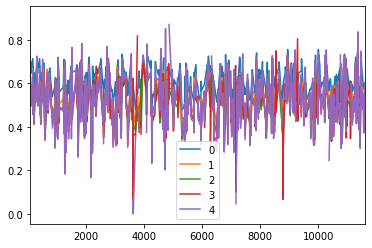

In [14]:
testRunsComp.stepsMoving.apply(lambda o:o[0]).div(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])).plot(label='0')
testRunsComp.stepsMoving.apply(lambda o:o[1]).div(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])).plot(label='1')
testRunsComp.stepsMoving.apply(lambda o:o[2]).div(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])).plot(label='2')
testRunsComp.stepsMoving.apply(lambda o:o[3]).div(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])).plot(label='3')
testRunsComp.stepsMoving.apply(lambda o:o[4]).div(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])).plot(label='4')
plt.legend()

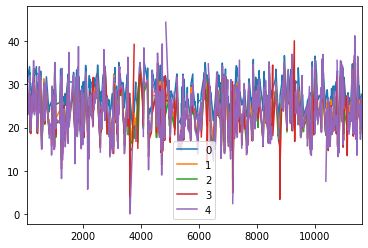

In [15]:
(testRunsComp.distanceTraveled.apply(lambda o:o[0]).div(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])) * 7.5 / 1000 * 60 * 60).plot(label='0')
(testRunsComp.distanceTraveled.apply(lambda o:o[1]).div(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])) * 7.5 / 1000 * 60 * 60).plot(label='1')
(testRunsComp.distanceTraveled.apply(lambda o:o[2]).div(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])) * 7.5 / 1000 * 60 * 60).plot(label='2')
(testRunsComp.distanceTraveled.apply(lambda o:o[3]).div(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])) * 7.5 / 1000 * 60 * 60).plot(label='3')
(testRunsComp.distanceTraveled.apply(lambda o:o[4]).div(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])) * 7.5 / 1000 * 60 * 60).plot(label='4')
plt.legend()

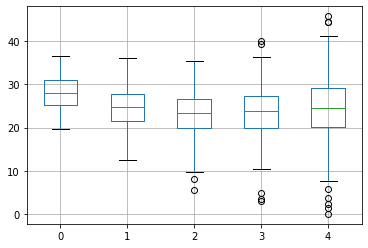

In [16]:
pd.DataFrame([testRunsComp.distanceTraveled.apply(lambda o:o[i]).div(testRunsComp.stepsMoving.apply(lambda o:o[i])+testRunsComp.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot()

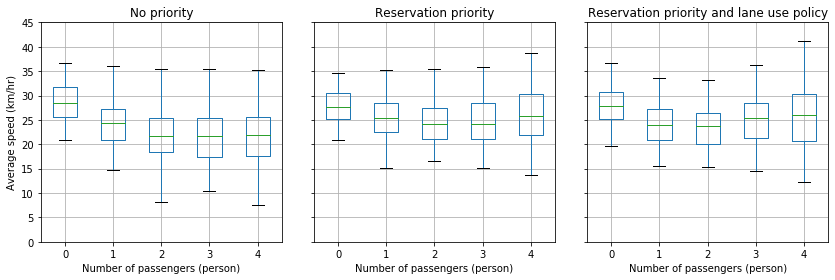

In [17]:
fig, axs = plt.subplots(1,3, sharey='row', figsize=(12,4))
#fig.suptitle('Average Speed by number of passengers')
df=testRunsComp.loc[(testRunsComp.reservationPriority == False) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[0], showfliers=False)
axs[0].set_title('No priority')
axs[0].set_xlabel('Number of passengers (person)')
axs[0].set_ylabel('Average speed (km/hr)')
plt.ylim([0,45])
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[1], showfliers=False)
axs[1].set_title('Reservation priority')
axs[1].set_xlabel('Number of passengers (person)')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[2], showfliers=False)
axs[2].set_title('Reservation priority and lane use policy')
axs[2].set_xlabel('Number of passengers (person)')
plt.tight_layout()
plt.show()

TypeError: 'int' object is not subscriptable

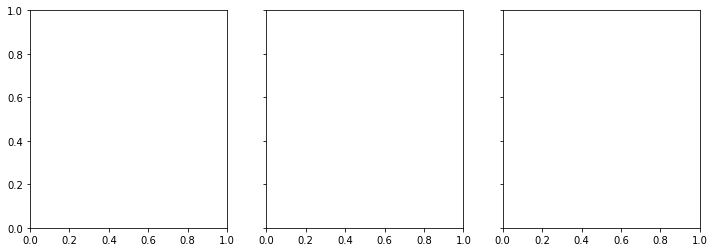

In [18]:
fig, axs = plt.subplots(1,3, sharey='row', figsize=(12,4))
#fig.suptitle('Average Speed by number of passengers')
df=testRunsComp.loc[(testRunsComp.reservationPriority == False) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.tripsCompleted.apply(lambda o:o[i]) for i in range(5)]).transpose().boxplot(ax=axs[0], showfliers=False)
axs[0].set_title('No priority')
axs[0].set_xlabel('Number of passengers (person)')
axs[0].set_ylabel('Average speed (km/hr)')
plt.ylim([0,45])
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[1], showfliers=False)
axs[1].set_title('Reservation priority')
axs[1].set_xlabel('Number of passengers (person)')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[2], showfliers=False)
axs[2].set_title('Reservation priority and lane use policy')
axs[2].set_xlabel('Number of passengers (person)')
plt.tight_layout()
plt.show()

In [20]:
[df.stepsMoving.apply(lambda o:o[i]) for i in range(5)]

[74       1157181
 92        575112
 170       863225
 197       530858
 254       147500
           ...   
 11454      87240
 11490    1218838
 11529     116389
 11574      84586
 11615      96573
 Name: stepsMoving, Length: 237, dtype: int64, 74       1413811
 92       1501326
 170      1298994
 197      1450468
 254      1124658
           ...   
 11454     446961
 11490    1242187
 11529     837810
 11574     571390
 11615     861296
 Name: stepsMoving, Length: 237, dtype: int64, 74       179333
 92       456209
 170      244674
 197      509050
 254      848572
           ...  
 11454    426727
 11490    126813
 11529    769998
 11574    491802
 11615    836559
 Name: stepsMoving, Length: 237, dtype: int64, 74        19965
 92       114345
 170       46740
 197      155319
 254      484901
           ...  
 11454    389531
 11490     16737
 11529    555178
 11574    383442
 11615    588834
 Name: stepsMoving, Length: 237, dtype: int64, 74         4143
 92        36331
 170       1

In [ ]:
fig, axs = plt.subplots(1,2, sharey='row', figsize=(8,4))
#fig.suptitle('Average Speed by number of passengers')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[0], showfliers=False)
axs[0].set_title('Reservation priority')
axs[0].set_xlabel('Number of passengers (person)')
axs[0].set_ylabel('Average speed (km/hr)')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[1], showfliers=False)
axs[1].set_title('Reservation priority and lane use policy')
axs[1].set_xlabel('Number of passengers (person)')
plt.tight_layout()
plt.show()

In [ ]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == False) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed no priority')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
#plt.ylim([0,25])
plt.show()

In [ ]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed with reservation priority')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
plt.ylim([0,25])
plt.show()

In [ ]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed with reservation priority and lane use policy')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
#plt.ylim([0,25])
plt.show()

In [ ]:
df=testRunsComp[['averageStepsPerTrip','reservationPriority', 'lanePolicy']]

In [ ]:
#testRunsComp.loc[testRunsComp.tripsCompleted.idxmax()]

In [ ]:
df = testRunsComp
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.scatterplot(df.index, "tripsCompleted", data=df, hue='reservationPriority', style='hovMin', ax=ax)

In [ ]:
tmp = testRunsComp.loc[testRunsComp.groupby(['seed']).tripsCompleted.idxmax().values]
tmp

In [ ]:
testRunsComp2 = testRunsComp[testRunsComp.seed.isin(tmp.loc[tmp.hovMin == 3].seed.values)].copy()
#testRunsComp = testRunsComp[testRunsComp.lastTripStep == 3599]
testRunsComp2

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot(df.index, "averageSpeed", data=testRunsComp, hue='reservationPriority', style='hovMin', ax=ax)